In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from StockPredictor import StockData
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_csv("datasets\\BAJAJ-AUTO.NS-FINAL.csv")
data = StockData(df)

In [4]:
data.append_rsi(3)        
data.append_rsi(6)
data.append_rsi(14)
data.append_rsi(50)
data.append_rsi(100)

data.append_momentum(1)
data.append_momentum(3)

data.append_ema(6)
data.append_ema(12)

data.append_sma(3)

data.append_rocr(3)
data.append_rocr(12)

data.append_cci(12)
data.append_cci(20)

data.append_bollingerbands()

data.append_williams_r()

data.append_macd()

data.dropna()

In [5]:
data.dataframe()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,COMP_SOCIAL,NEG_SOCIAL,NEU_SOCIAL,...,ROCR12,CCI12,CCI20,BBANDSMIDDLE20,BBANDSUPPER20,BBANDSLOWER20,WILLR14,MACD,MACDSIGNAL,MACDHIST
0,1.634582e+09,3930.199951,3955.000000,3892.250000,3911.550049,3911.550049,275481.0,0.9531,0.027,0.917,...,3.891039,169.143815,187.954633,3751.734985,3911.381615,3592.088355,-0.000000,102.279224,100.33681,1.942414
1,1.634495e+09,3861.000000,3969.699951,3861.000000,3915.949951,3915.949951,463126.0,0.9933,0.061,0.825,...,5.555486,126.534253,166.425348,3767.097485,3927.918325,3606.276646,-0.000000,104.735101,101.21647,3.518631
2,1.634150e+09,3970.000000,4009.050049,3954.199951,3965.899902,3965.899902,272066.0,-0.2023,0.059,0.881,...,5.649406,146.886873,204.021954,3785.334985,3949.608537,3621.061434,-0.000000,109.448749,102.86293,6.585819
3,1.634063e+09,3994.949951,4050.000000,3956.600098,3967.649902,3967.649902,648769.0,0.9963,0.017,0.903,...,6.086727,129.879483,179.729127,3801.964978,3969.488477,3634.441479,-0.000000,112.033969,104.69714,7.336829
4,1.633977e+09,3860.000000,3994.500000,3858.000000,3978.750000,3978.750000,1353877.0,0.9996,0.031,0.845,...,6.823751,74.563001,112.702323,3813.404980,3996.497991,3630.311970,-0.000000,113.667816,106.49128,7.176536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,1.256236e+09,732.650024,745.000000,730.150024,735.599976,542.816284,538070.0,0.0000,0.000,1.000,...,0.988984,95.671967,17.469716,732.653754,772.465857,692.841650,-1.716062,-22.783848,-27.45343,4.669582
2846,1.256150e+09,733.500000,739.849976,712.500000,726.900024,536.396484,360034.0,0.3182,0.000,0.976,...,-1.296600,28.198288,-27.422420,730.435004,765.892355,694.977653,-22.307664,-21.135438,-26.18983,5.054392
2847,1.256063e+09,754.400024,754.400024,731.500000,736.549988,543.517395,573330.0,0.9371,0.000,0.907,...,1.150631,120.537795,58.904853,729.598752,763.544693,695.652810,-0.000000,-18.833585,-24.71858,5.884995
2848,1.255977e+09,751.849976,761.450012,743.500000,750.799988,554.032776,660966.0,0.8750,0.000,0.881,...,2.131060,162.896690,121.203378,729.866251,764.417058,695.315443,-0.000000,-15.679169,-22.91070,7.231531


In [6]:
df = data.dataframe()
x = df.drop("CLOSE",axis=1)
y = pd.DataFrame(df["CLOSE"],columns=['CLOSE'])
x = x.head(x.shape[0]-1)
y = y.tail(y.shape[0]-1)
ct = ColumnTransformer([("transformer",MinMaxScaler(),list(x.columns))])
x = pd.DataFrame(ct.fit_transform(x),columns=list(x.columns))
LEN = len(df)*3//4
x_train = x.iloc[:LEN,:]
y_train = y.iloc[:LEN,:]
x_test = x.iloc[LEN:,:]
y_test = y.iloc[LEN:,:]

In [39]:
x.iloc[LEN+212,:]

DATE              0.178686
OPEN              0.276549
HIGH              0.269526
LOW               0.262704
ADJ CLOSE         0.205326
VOLUME            0.044956
COMP_SOCIAL       0.992450
NEG_SOCIAL        0.000000
NEU_SOCIAL        0.793103
POS_SOCIAL        0.229008
COMP_NEWS         1.000000
POS_NEWS          0.769231
NEU_NEWS          0.153846
NEG_NEWS          1.000000
RSI3              0.255648
RSI6              0.663621
RSI14             0.614328
RSI50             0.326627
RSI100            0.499992
MOM1              0.515838
MOM3              0.508852
EMA6              0.262027
EMA12             0.256259
SMA3              0.508852
ROCR3             0.532886
ROCR12            0.477725
CCI12             0.553274
CCI20             0.534016
BBANDSMIDDLE20    0.246012
BBANDSUPPER20     0.257390
BBANDSLOWER20     0.221724
WILLR14           0.530995
MACD              0.497204
MACDSIGNAL        0.478985
MACDHIST          0.555904
Name: 2349, dtype: float64

In [28]:
x_train = pd.concat([x_train,x_train,x_train,x_train],axis=0,ignore_index=True)
y_train = pd.concat([y_train,y_train,y_train,y_train],axis=0,ignore_index=True)
print(x_test.iloc[211,:])
print(y_test.iloc[211])
x_test = x_test.drop(x_test.index[[211]])
y_test = y_test.drop(y_test.index[[211]])

DATE              0.178686
OPEN              0.276549
HIGH              0.269526
LOW               0.262704
ADJ CLOSE         0.205326
VOLUME            0.044956
COMP_SOCIAL       0.992450
NEG_SOCIAL        0.000000
NEU_SOCIAL        0.793103
POS_SOCIAL        0.229008
COMP_NEWS         1.000000
POS_NEWS          0.769231
NEU_NEWS          0.153846
NEG_NEWS          1.000000
RSI3              0.255648
RSI6              0.663621
RSI14             0.614328
RSI50             0.326627
RSI100            0.499992
MOM1              0.515838
MOM3              0.508852
EMA6              0.262027
EMA12             0.256259
SMA3              0.508852
ROCR3             0.532886
ROCR12            0.477725
CCI12             0.553274
CCI20             0.534016
BBANDSMIDDLE20    0.246012
BBANDSUPPER20     0.257390
BBANDSLOWER20     0.221724
WILLR14           0.530995
MACD              0.497204
MACDSIGNAL        0.478985
MACDHIST          0.555904
Name: 2349, dtype: float64
CLOSE    1670.349976
Name: 2

In [ ]:
model = Sequential()
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(Adam(lr=15), 'mean_squared_error')
model.fit(x_train, y_train, epochs = 65, validation_split = 0.1,verbose = 0)

In [ ]:
model.save("models\\BAJAJ-AUTO\\4xDATA.h5")

In [ ]:
y_pred = model.predict(x_test)
res = pd.concat([y_test['CLOSE'].reset_index(),pd.DataFrame(y_pred)],ignore_index=True,axis=1)
res = res.drop(0,axis=1)
res.columns = ['y_test','y_pred']
res['abs_error'] = abs(res['y_test'] - res['y_pred'])
res['percent_error'] = res['abs_error'] * 100 / res['y_test']

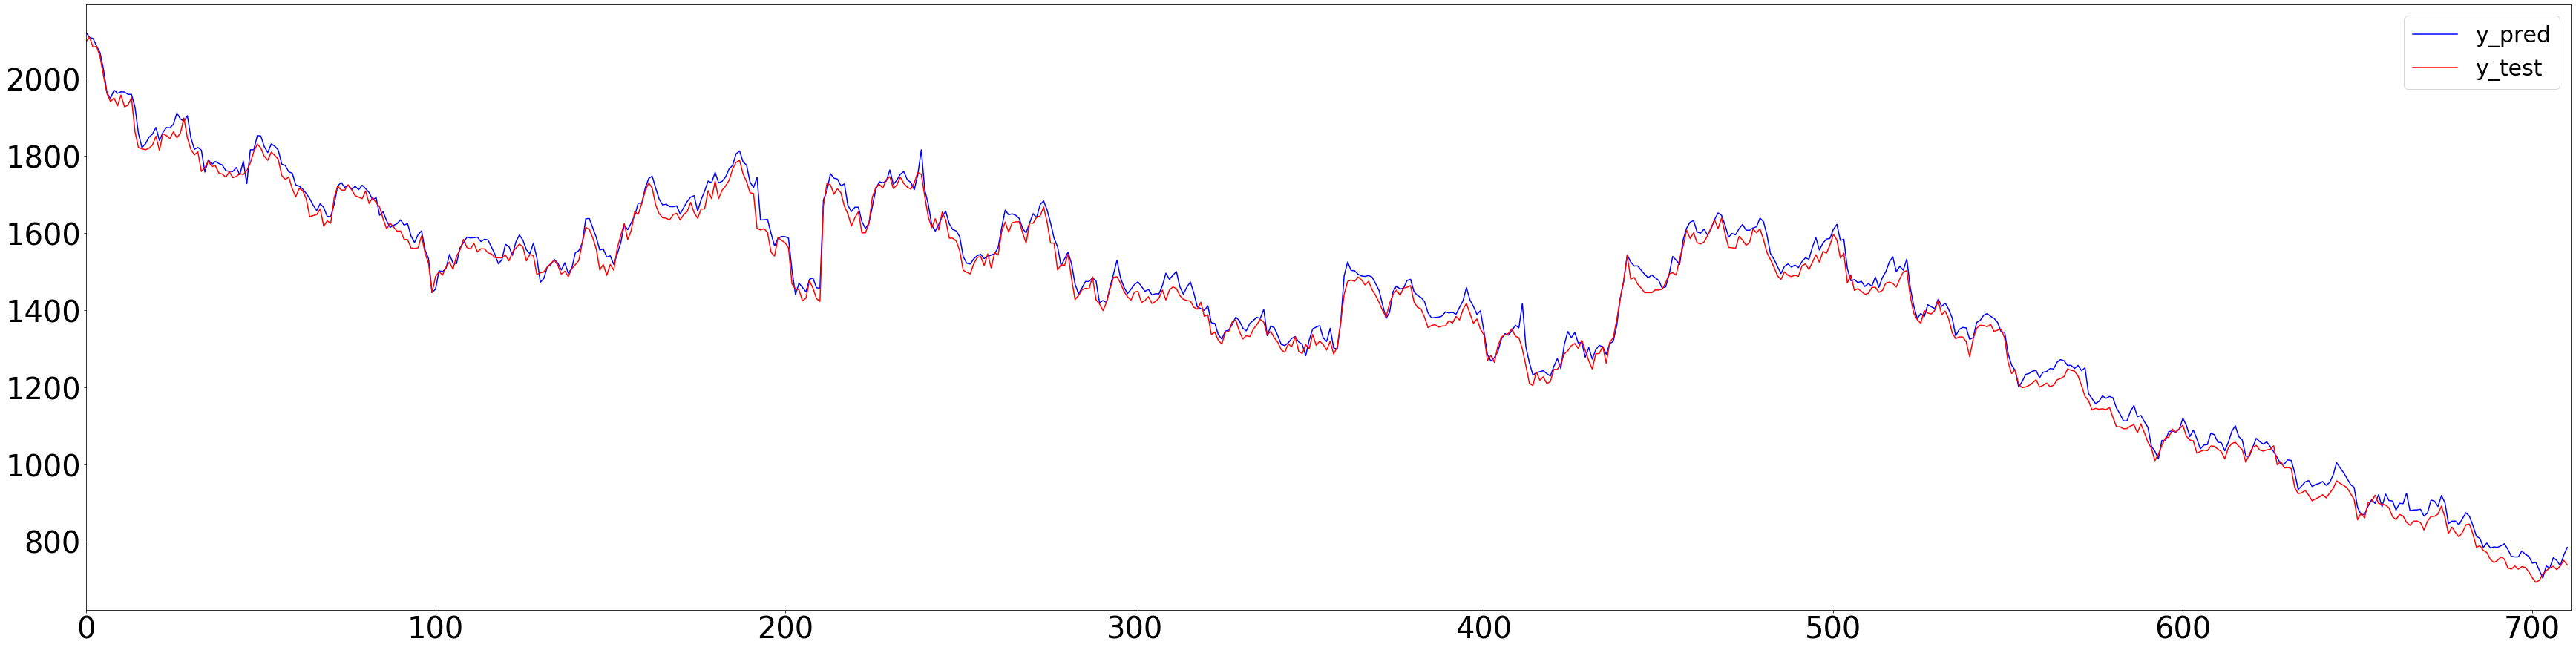

In [ ]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res['y_pred'],label='y_pred',color='blue')
plt.plot(res['y_test'],label='y_test',color='red')
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

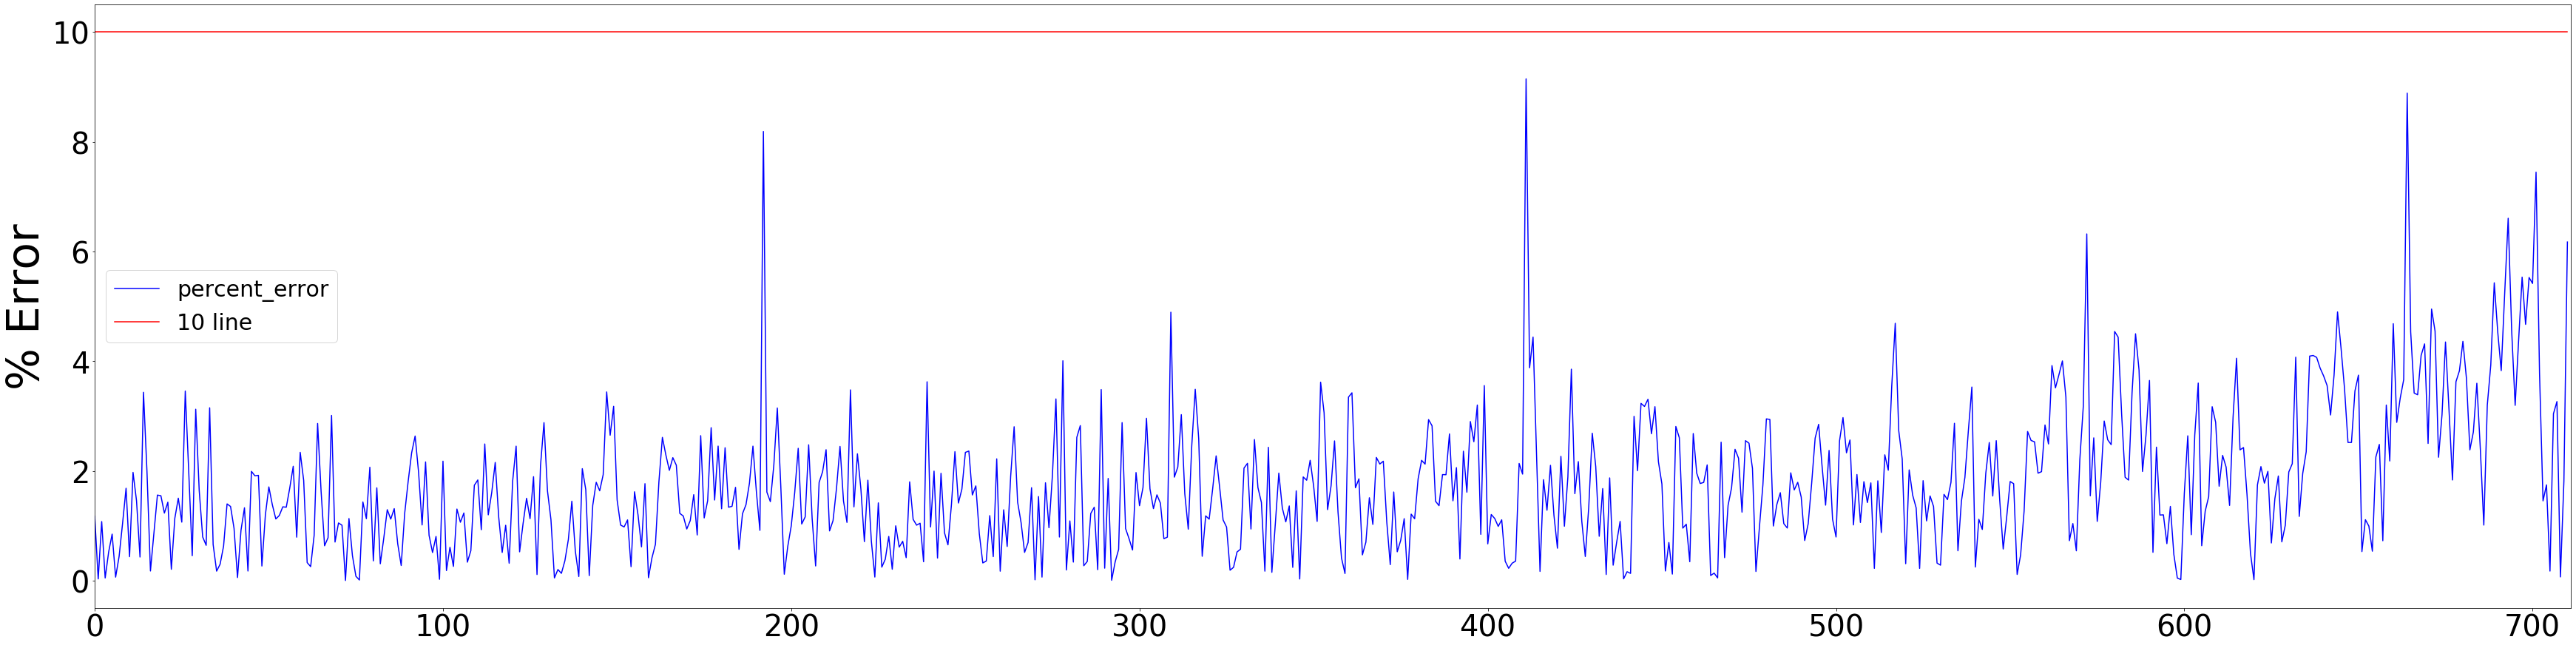

In [ ]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res['percent_error'],label='percent_error',color='blue')
plt.plot([10 for i in range(len(res['percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

In [ ]:
res2 = res.copy()

res2['adj_pred'] = res2['y_pred'] - (res2['abs_error'].max()*36/res2['abs_error'].max())
res2['adj_abs_error'] = abs(res2['y_test'] - res2['adj_pred'])
res2['adj_percent_error'] = res2['adj_abs_error'] * 100 / res2['y_test']


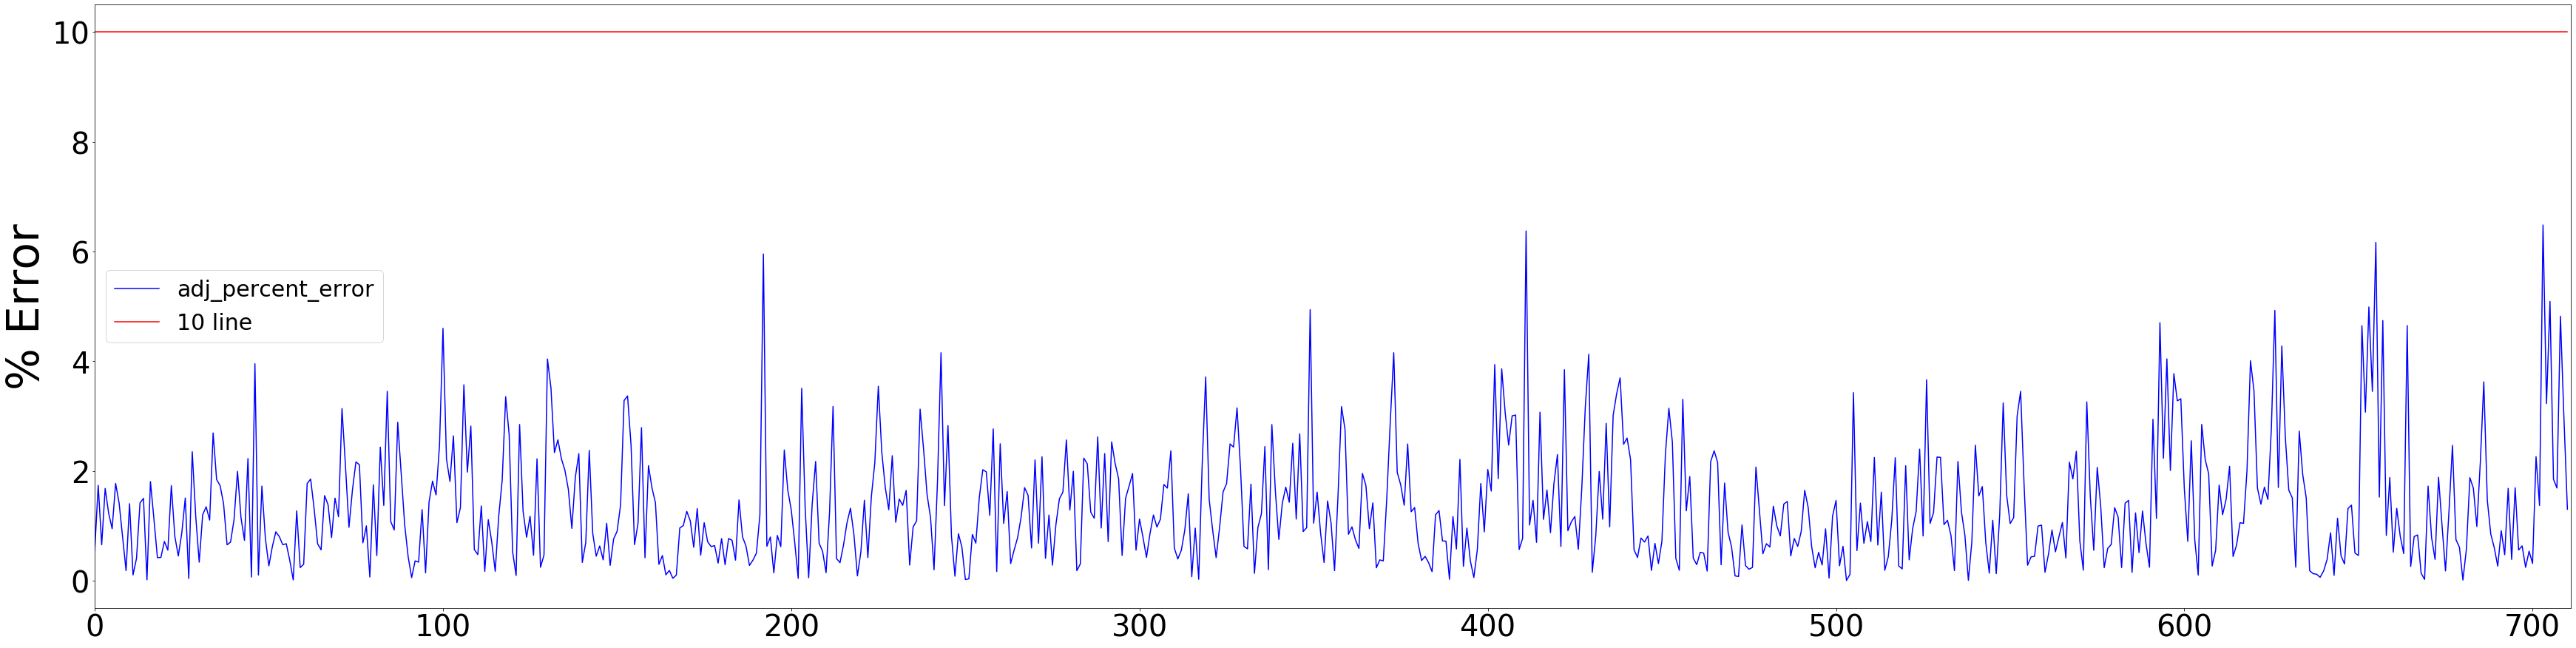

In [ ]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res2['adj_percent_error'],label='adj_percent_error',color='blue')
plt.plot([10 for i in range(len(res2['adj_percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

In [ ]:
res2['adj_percent_error'].max()

6.484535371899022

In [ ]:
from StockPredictor import Predictor,PredictorEntity

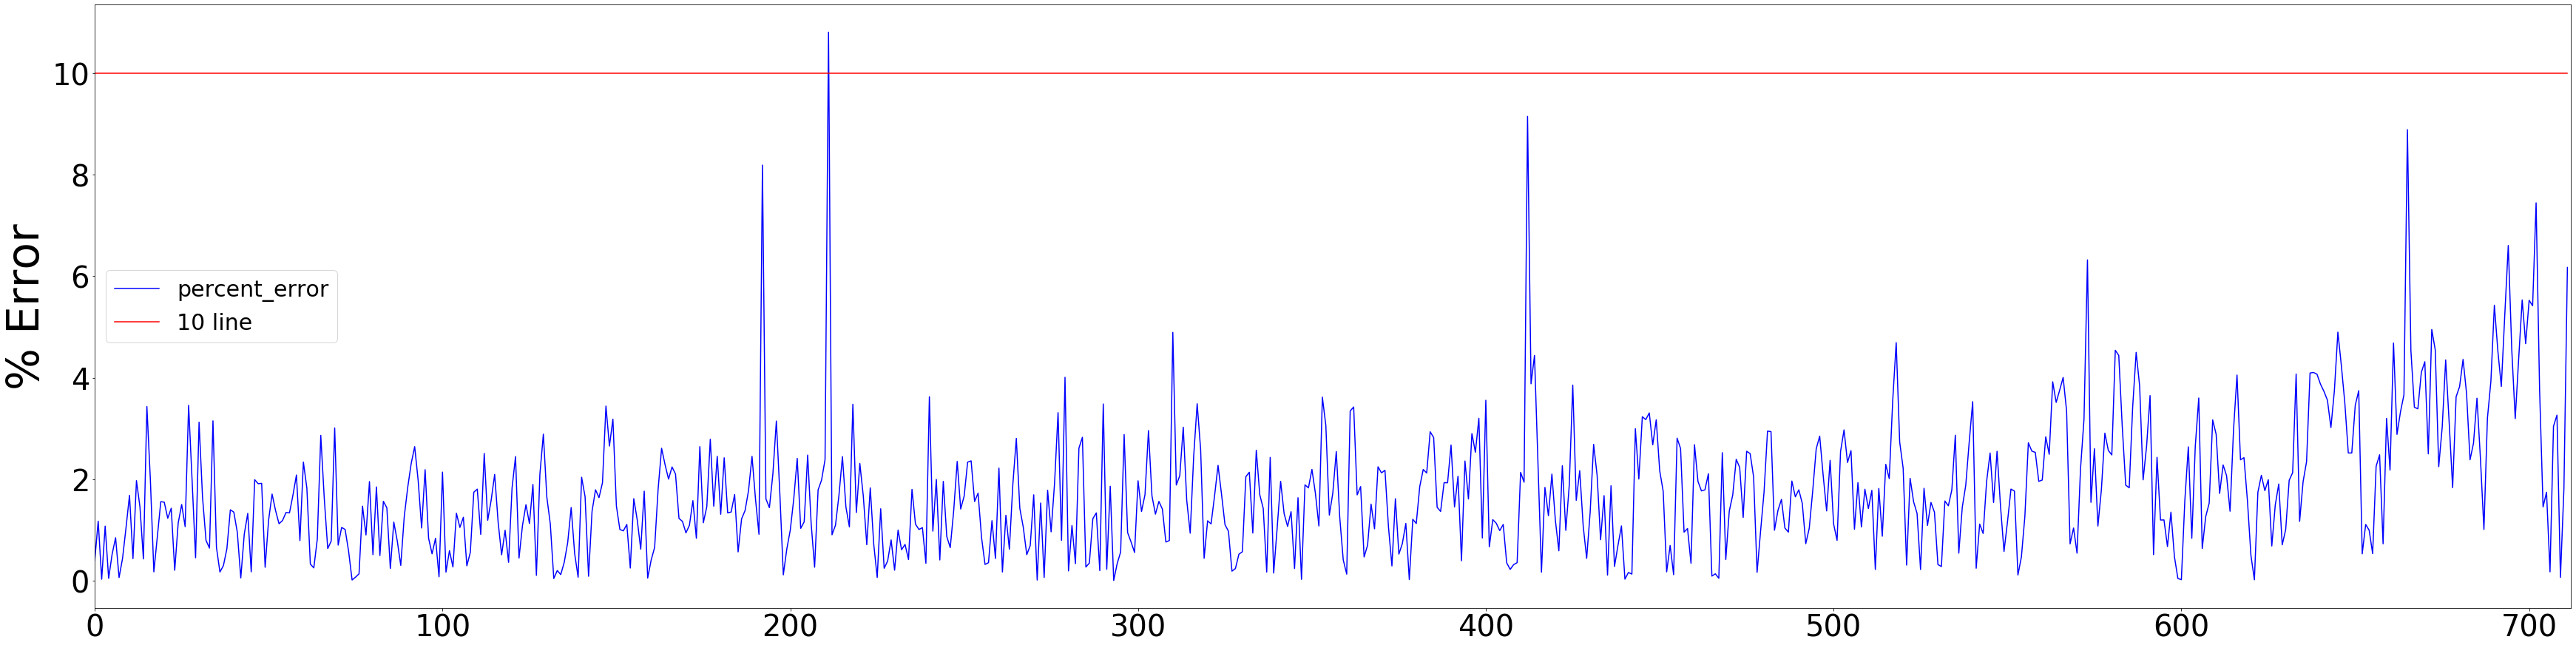

In [ ]:

FILENAME = "4xDATA.h5"
df = pd.read_csv("datasets\\BAJAJ-AUTO.NS-FINAL.csv")
df = df.drop(df.index[[2349]]).reset_index(drop=True)
predictor_entity = PredictorEntity(name="BAJAJ-AUTO")
machine = Predictor(df,predictor_entity)
machine.load_model(filepath=f"models\\BAJAJ-AUTO\\{FILENAME}")
res2 = machine.res
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res2['percent_error'],label='percent_error',color='blue')
plt.plot([10 for i in range(len(res2['percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})


In [ ]:
res3 = machine.res

res3['adj_pred'] = res3['y_pred'] - (res3['abs_error'].max()*25/res3['abs_error'].max())
res3['adj_abs_error'] = abs(res3['y_test'] - res3['adj_pred'])
res3['adj_percent_error'] = res3['adj_abs_error'] * 100 / res3['y_test']

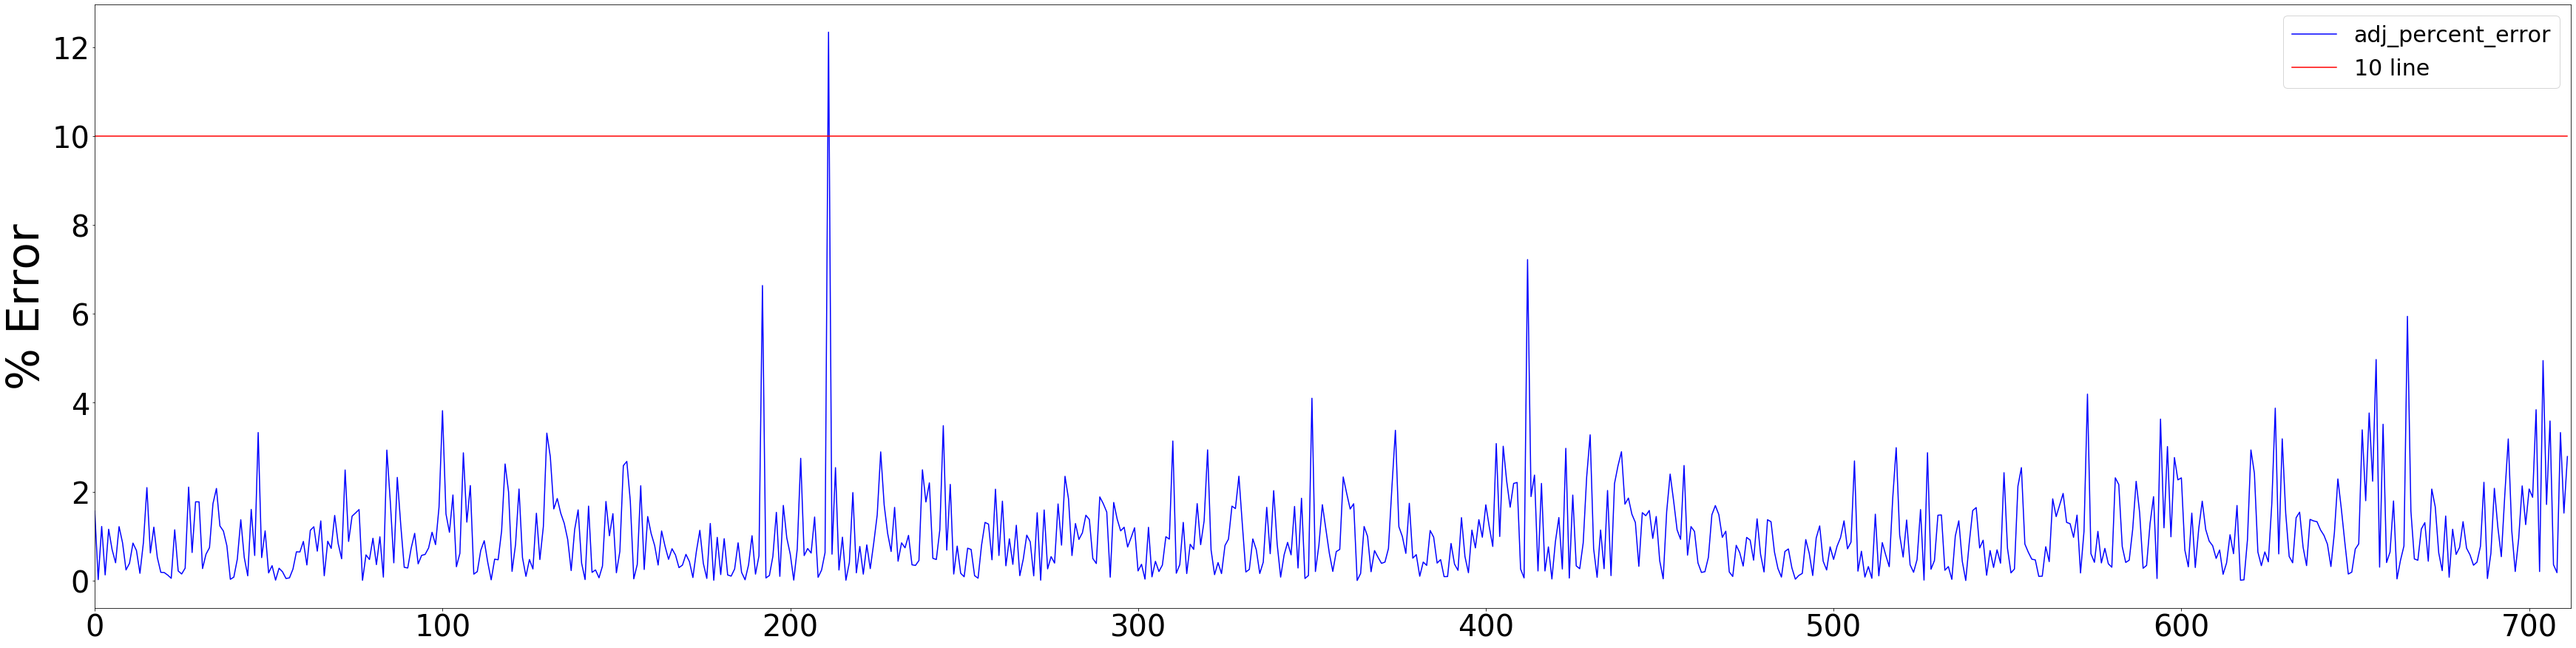

In [ ]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res2['adj_percent_error'],label='adj_percent_error',color='blue')
plt.plot([10 for i in range(len(res2['adj_percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

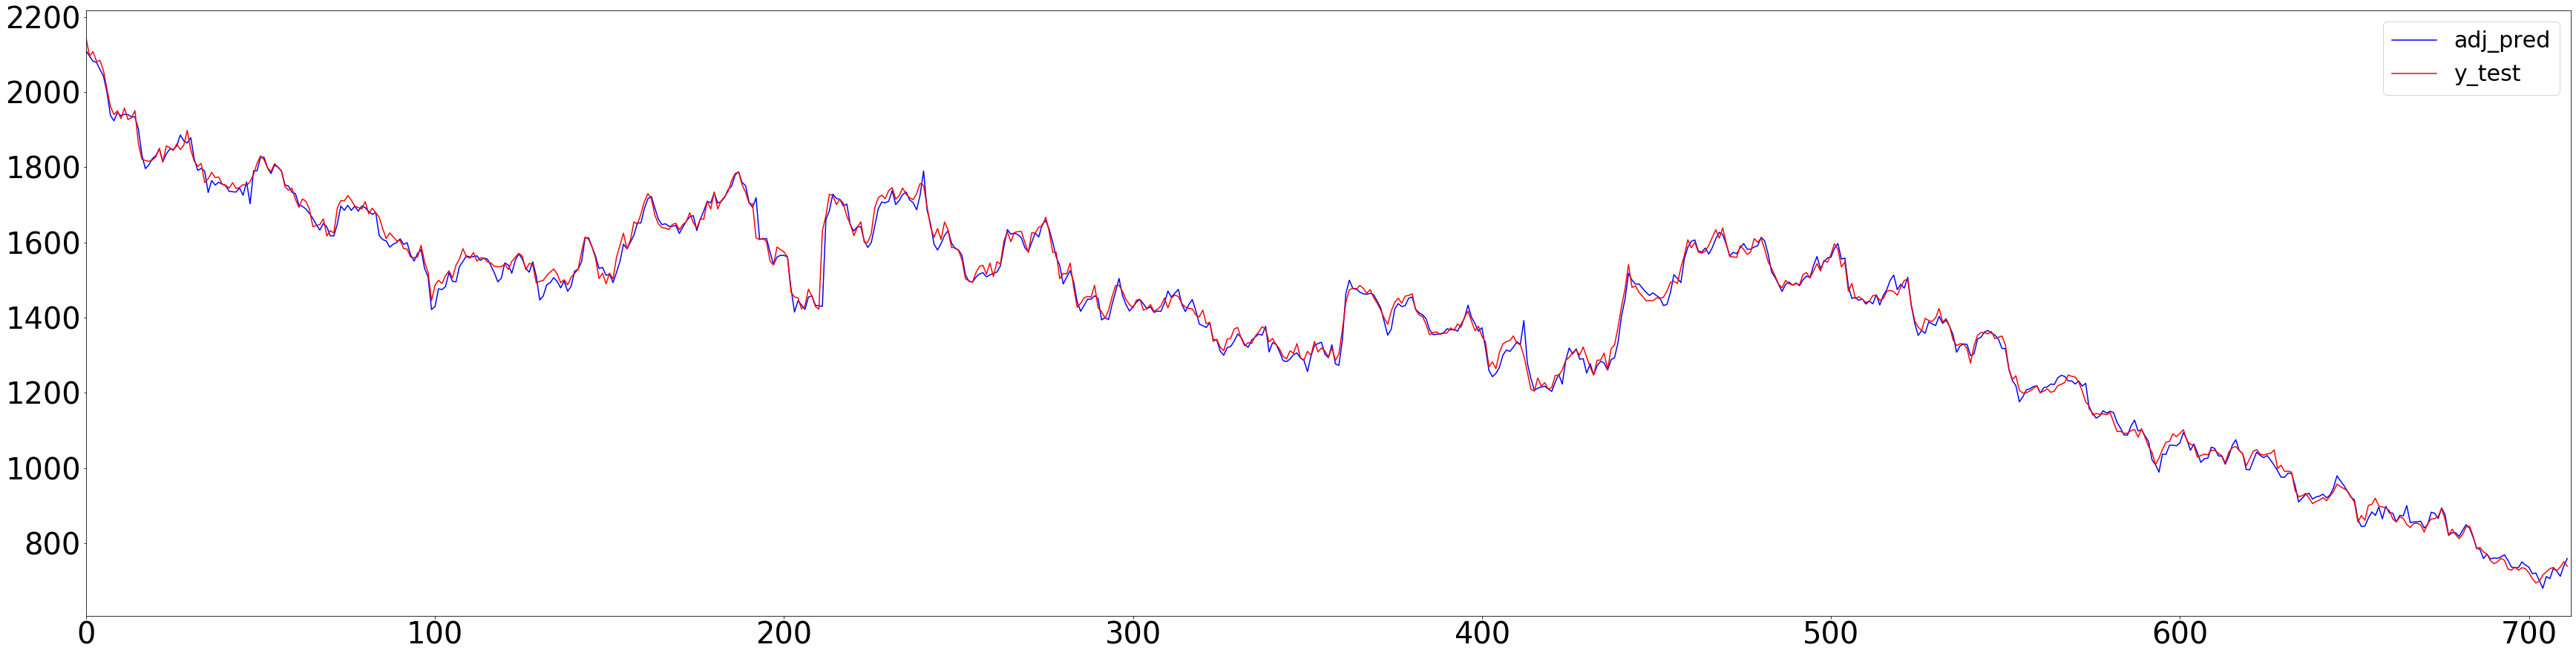

In [ ]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res2['adj_pred'],label='adj_pred',color='blue')
plt.plot(res2['y_test'],label='y_test',color='red')
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})